# Monte Carlo(MC) Estimation

We will be using MC estimation on sample 4x4 grid world  

![GridWorld](./figs/gridworld.png "Grid World")


### Monte Carlo Prediction for Estimation ("first-visit")

Monte Carlo Prediction is carried out by sampling the trajectories over many episodes and using the rewards seen in samples as estimate for state values. The backup digram is given below. Pseudo code for the algorithm is given in Fig 4-2 in the text.

![MC backup](./figs/mc_backup.png "MC Backup")


#### Running in Colab/Kaggle

If you are running this on Colab, please uncomment below cells and run this to install required dependencies.

In [ ]:
## Uncomment and execute this cell to install all the the dependencies if running in Google Colab or Kaggle

## Uncomment and run for Colab
# !pip install gymnasium==0.29.1 pygame==2.3.0 -q
# !git clone https://github.com/nsanghi/drl-2ed
# %cd /content/drl-2ed 
# %cd chapter4


## Uncomment and run for Kaggle
# !pip install gymnasium==0.29.1 pygame==2.3.0 -q
# !git clone https://github.com/nsanghi/drl-2ed
# %cd /content/drl-2ed 
# %cd chapter4

In [5]:
# Initial imports and environment setup
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# create grid world environment
from gridworld_mfree import GridWorldEnv
size = 4
env = GridWorldEnv(size=size)

In [6]:
# MC Policy Evaluation

def mc_policy_eval(policy, env, discount_factor=1.0, episode_count=100):
    """
    Evaluate a policy given an environment.

    Args:
        policy: [S, A]shaped matrix representing the policy. Random in our case
        env: GridWorld env. In model free setup you have no access 
             transition dynamics of the environment.
             use step(a) to take an action and receive a tuple of (
             s', r, done, terminated, info)
             env.nS is number of states in the environment.
             env.nA is number of actions in the environment.
        episode_count: Number of episodes:
        discount_factor: Gamma discount factor.

    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with (all 0) state value array and a visit count of zero
    V = np.zeros(env.nS)
    N = np.zeros(env.nS)
    i = 0

    # run multiple episodes
    while i < episode_count:

        # collect samples for one episode
        episode_states = []
        episode_returns = []
        state, _ = env.reset()
        episode_states.append(state)
        while True:
            action = np.random.choice(env.nA, p=policy[state])
            (state, reward, done, _, _) = env.step(action)
            episode_returns.append(reward)
            if not done:
                episode_states.append(state)
            else:
                break

        # update state values
        G = 0
        count = len(episode_states)
        for t in range(count-1, -1, -1):
            s, r = episode_states[t], episode_returns[t]
            G = discount_factor * G + r
            if s not in episode_states[:t]:
                N[s] += 1
                V[s] = V[s] + 1/N[s] * (G-V[s])

        i = i+1

    return np.array(V)

In [7]:
# Custom print to show state values inside the grid
def grid_print(V, k=None):
    ax = sns.heatmap(V.reshape(env.shape),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)

    if k:
        ax.set(title="K = {0}".format(k))
    plt.show()

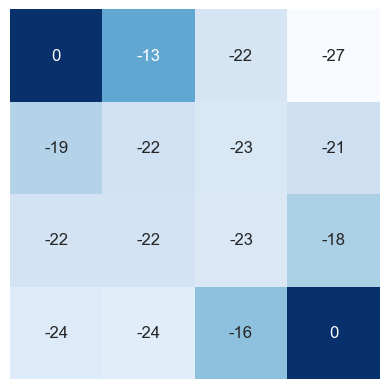

In [8]:
# Create a random policy
random_policy = np.ones([env.nS, env.nA]) / env.nA

# run mc policy prediction for 100 episodes for random policy
V_pi = mc_policy_eval(
    random_policy,
    env,
    discount_factor=1.0,
    episode_count=100)

# Print policy
grid_print(V_pi.reshape(env.shape))

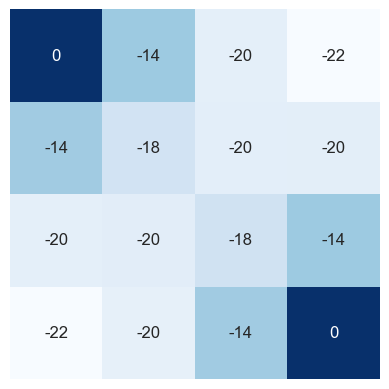

In [9]:
# run mc policy prediction for 10000 episodes for random policy
V_pi = mc_policy_eval(
    random_policy, env,
    discount_factor=1.0,
    episode_count=10000)

# Print policy
grid_print(V_pi.reshape(env.shape))

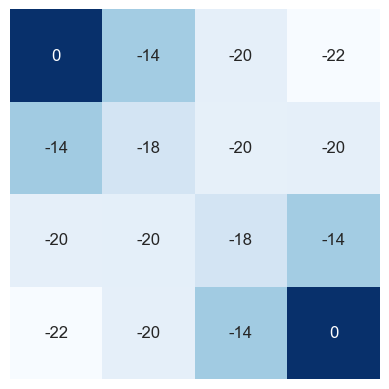

In [10]:
# run mc policy prediction for 100000 episodes for random policy
V_pi = mc_policy_eval(
    random_policy,
    env,
    discount_factor=1.0,
    episode_count=100000)

# Print policy
grid_print(V_pi.reshape(env.shape))

### Conclusion

We see that state values do not converge very well for 100 episode simulation. However, with 10,000 episode simulation the values have come close to those we saw in `3.a-policy-evaluation.ipynb` where policy evaluation using DP was carried out. 